In [1]:
from PIL import Image, ImageOps, ImageMath, ImageEnhance
#%pylab inline

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

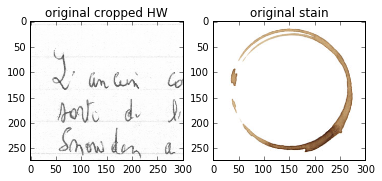

In [4]:
def add_transparency(bg_image):
    if (bg_image.mode is not "RGBA"):
        bg_image = bg_image.convert("RGBA")

    pixdata = bg_image.load()

    for y in xrange(bg_image.size[1]):
        for x in xrange(bg_image.size[0]):
            if pixdata[x, y] == (255, 255, 255, 255):
                pixdata[x, y] = (255, 255, 255, 0)
    return bg_image

nmec_fr_003_001 = Image.open("/work/fs4/datasets/nmec-handwriting/stil-writing-corpus/French/French-Images/FR-003-001.tif").convert('RGBA')
nmec_fr_003_001_resize = nmec_fr_003_001.resize(tuple([x / 3 for x in nmec_fr_003_001.size]))

stain1 = Image.open("./coffee_stain_1.jpg").convert('RGBA')
stain1_w, stain1_h = stain1.size
offset1 = 250
nmec_fr_003_001_crop = nmec_fr_003_001_resize.crop((offset1, offset1, offset1+stain1_w, offset1+stain1_h))
fig = plt.figure()
pic1 = fig.add_subplot(1,2,1)
plt.imshow(np.asarray(nmec_fr_003_001_crop))
pic1.set_title('original cropped HW')
pic1 = fig.add_subplot(1,2,2)
plt.imshow(np.asarray(stain1))
pic1.set_title('original stain')

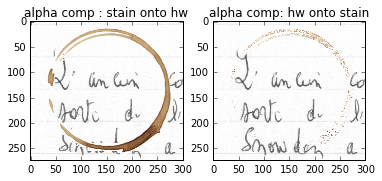

In [5]:
#mode 'L' doesn't work; RGBA does
alphac = Image.alpha_composite(nmec_fr_003_001_crop, add_transparency(stain1))
fig = plt.figure()
pic1 = fig.add_subplot(1,2,1)
plt.imshow(np.asarray((alphac)))
pic1.set_title('alpha comp : stain onto hw')
alphac = Image.alpha_composite(stain1, add_transparency(nmec_fr_003_001_crop))
pic1 = fig.add_subplot(1,2,2)
plt.imshow(np.asarray((alphac)))
pic1.set_title('alpha comp: hw onto stain')

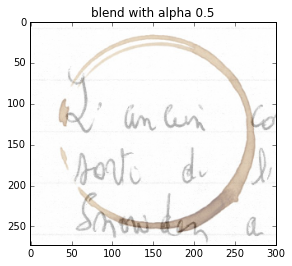

In [6]:
blend = Image.blend(stain1, nmec_fr_003_001_crop, 0.5)
plt.imshow(np.asarray(blend))
plt.title("blend with alpha 0.5")

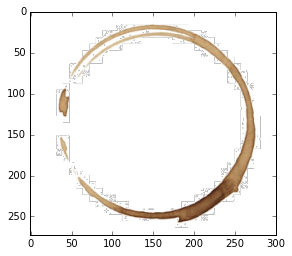

In [7]:
#Image.composite(fg, bg, mask_image) is not appropriate because we don't have all three 
nmec_fr_003_001_crop_orig = nmec_fr_003_001_crop.copy()
nmec_fr_003_001_crop.paste(add_transparency(stain1))
plt.imshow(np.asarray(nmec_fr_003_001_crop))

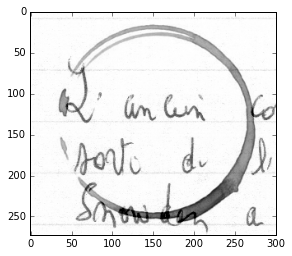

In [8]:
stain_gray_inv = ImageOps.invert(stain1.convert('L'))

hw_gray = ImageOps.invert(nmec_fr_003_001_crop_orig.convert('L'))

summed_inversion = ImageMath.eval("convert(a+b, 'L')", a=stain_gray_inv, b=hw_gray)
plt.imshow(ImageOps.invert(summed_inversion), cmap='gray')

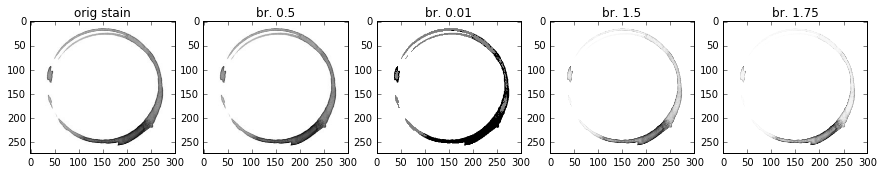

In [9]:
# to lighten stain, slide between 1.0 and ~2.0; doc. says 0.0 gives black image
#preferred method vs. below's "contrast"
fig = plt.figure(figsize=(15,3))
enhancer = ImageEnhance.Brightness(stain1)
pic1 = fig.add_subplot(1,5,1)
plt.imshow(np.asarray(enhancer.enhance(1.0).convert('L')), cmap='gray')
pic1.set_title('orig stain')
pic1 = fig.add_subplot(1,5,2)
plt.imshow(np.asarray((enhancer.enhance(0.5).convert('L'))), cmap='gray')
pic1.set_title('br. 0.5')
pic1 = fig.add_subplot(1,5,3)
plt.imshow(np.asarray((enhancer.enhance(0.01).convert('L'))), cmap='gray')
pic1.set_title('br. 0.01')
pic1 = fig.add_subplot(1,5,4)
plt.imshow(np.asarray((enhancer.enhance(1.5).convert('L'))), cmap='gray')
pic1.set_title('br. 1.5')
pic1 = fig.add_subplot(1,5,5)
plt.imshow(np.asarray((enhancer.enhance(1.75).convert('L'))), cmap='gray')
pic1.set_title('br. 1.75')

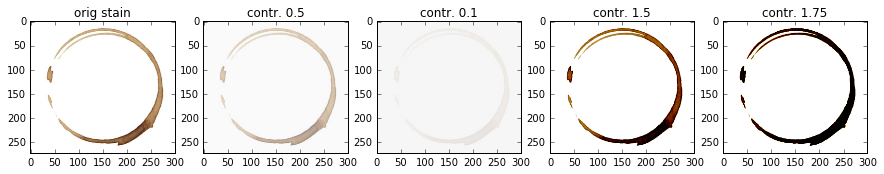

In [10]:
#to lighten stain, slide between 1.0 and ~0.0.....but entire image gets grayer, not just stain
#documentation says 0.0 results in all-gray image
#not converting this to grayscale to show effect, and because I don't want this enhancer anyway
fig = plt.figure(figsize=(15,3))
enhancer = ImageEnhance.Contrast(stain1)
pic1 = fig.add_subplot(1,5,1)
plt.imshow(np.asarray(enhancer.enhance(1.0)))
pic1.set_title('orig stain')
pic1 = fig.add_subplot(1,5,2)
plt.imshow(np.asarray((enhancer.enhance(0.5))))
pic1.set_title('contr. 0.5')
pic1 = fig.add_subplot(1,5,3)
plt.imshow(np.asarray((enhancer.enhance(0.1))))
pic1.set_title('contr. 0.1')
pic1 = fig.add_subplot(1,5,4)
plt.imshow(np.asarray((enhancer.enhance(2))))
pic1.set_title('contr. 1.5')
pic1 = fig.add_subplot(1,5,5)
plt.imshow(np.asarray((enhancer.enhance(5))))
pic1.set_title('contr. 1.75')

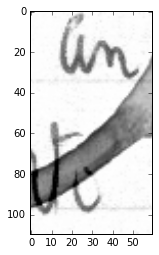

In [25]:
offset2 = 350
nmec_fr_003_001_small = nmec_fr_003_001_resize.crop((offset2, offset2, offset2+stain1_w, offset2+stain1_h))
#plt.imshow(np.asarray(nmec_fr_003_001_small))
#following line won't work
#print np.random.randint(0)

def get_rand_stain_w_random_brightness(shingle_img, stain_img, shin_dim, rng):
    #assumes RGBA stain > shingle in both dim
    #assumes shingle is 'L'
    stain_w, stain_h = stain_img.size
    max_rand_x = stain_w - shin_dim[1]
    max_rand_y = stain_h - shin_dim[0]
    startx = rng.randint(max_rand_x)
    starty = rng.randint(max_rand_y)
    rand_cropped_stain = stain_img.crop((startx, starty, startx+shin_dim[1], starty+shin_dim[0]))
    rand_bright = rng.random_sample()+1.0
    rand_faded_stain = ImageEnhance.Brightness(rand_cropped_stain).enhance(rand_bright).convert('L')
    stain_inv = ImageOps.invert(rand_faded_stain)
    shingle_inv = ImageOps.invert(shingle_img)
    return ImageOps.invert(ImageMath.eval("convert(a+b, 'L')", a=stain_inv, b=shingle_inv))

img = get_rand_stain_w_random_brightness(nmec_fr_003_001_small.crop((0,0,60,110)).convert('L'), stain1, shin_dim=(110,60), rng=np.random.RandomState())
plt.imshow(img, cmap="gray")